In [2]:
import os
import sys
from pathlib import Path
!pip install lxml
# ===================================================================
# 1) Projektwurzel automatisch finden (Ordner mit bootstrap.py)
# ===================================================================
def find_project_root(start: Path, marker="bootstrap.py"):
    start = start.resolve()
    p = start

    while True:
        if (p / marker).exists():
            return p
        if p.parent == p:
            raise RuntimeError(f"Projektwurzel nicht gefunden (Marker '{marker}').")
        p = p.parent

# Notebook-Verzeichnis
nb_path = Path(os.getcwd())
project_root = find_project_root(nb_path)

print("📁 Projektwurzel:", project_root)

# Arbeitsverzeichnis ändern
os.chdir(project_root)

# Python-Pfad aktualisieren
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# ===================================================================
# 2) Bootstrap importieren
# ===================================================================
import bootstrap

# ===================================================================
# 3) Projekt initialisieren
# ===================================================================
cfg = bootstrap.init(verbose=True)
cfg

📁 Projektwurzel: /Users/jakobkoppermann/Coding/inat_habitat_modeling
An error occurred: module 'importlib.metadata' has no attribute 'packages_distributions'
🔧 BOOTSTRAP: Lade Konfiguration
📁 Projektwurzel: /Users/jakobkoppermann/Coding/inat_habitat_modeling
📄 default.yaml: /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/default.yaml
📄 local.yaml:   /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/local.yaml
📄 Lade default.yaml: /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/default.yaml
📄 Lade local.yaml: /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/local.yaml
  ✔ YAMLs gemerged.
🌍 Region: berlin → [12.7, 52.0, 14.3, 53.0]
🧬 Species: macrolepiota_procera → Macrolepiota procera
🌍 Region WGS84: [12.7, 52.0, 14.3, 53.0]
   → UTM-CRS: EPSG:32633
   → bbox_utm: [342113.975565586, 5763535.991402085, 453023.0609648683, 5872499.713667939]
   ✔ Region → GEE synchronisiert

📂 Speziespfade:
   • output_dir_species: /Volumes/Data/iNaturalist/outputs/

/Users/jakobkoppermann/Coding/inat_habitat_modeling/venv/lib/python3.9/site-packages/google/api_core/_python_version_support.py:252: FutureWarning: You are using a Python version (3.9.6) past its end of life. Google will update google.api_core with critical bug fixes on a best-effort basis, but not with any other fixes or features. Please upgrade to the latest Python version, or at least Python 3.10, and then update google.api_core.
  warnings.warn(message, FutureWarning)
/Users/jakobkoppermann/Coding/inat_habitat_modeling/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


  ✔ EE initialisiert: inaturalist-474012

✅ BOOTSTRAP abgeschlossen.



{'project': {'name': 'inat-habitat-modeling',
  'author': 'Jakob Koeppen',
  'description': 'Modellierung von Habitaten basierend auf iNaturalist + EO-Daten'},
 'paths': {'project_root': '/Users/jakobkoppermann/Coding/inat_habitat_modeling',
  'base_data_dir': '/Volumes/Data/iNaturalist',
  'ndvi_dir': '/Volumes/Data/iNaturalist/NDVI_Exports',
  'ndwi_dir': '/Volumes/Data/iNaturalist/NDWI_Exports',
  'output_dir': '/Volumes/Data/iNaturalist/outputs',
  'temp_dir': '/Volumes/Data/iNaturalist/temp',
  'features_dir': '/Volumes/Data/iNaturalist/features',
  'background_dir': '/Volumes/Data/iNaturalist/background',
  'combined_dir': '/Volumes/Data/iNaturalist/combined',
  'processed_dir': '/Volumes/Data/iNaturalist/processed',
  'output_dir_species': '/Volumes/Data/iNaturalist/outputs/macrolepiota_procera',
  'features_dir_species': '/Volumes/Data/iNaturalist/features/macrolepiota_procera',
  'temp_dir_species': '/Volumes/Data/iNaturalist/temp/macrolepiota_procera'},
 'regions': {'berlin':

In [1]:
import sys
from pathlib import Path
import importlib

# ------------------------------------------------------------
# 1) Projekt-Root & pipe/ aktivieren
# ------------------------------------------------------------
project_root = Path("/Users/jakobkoppermann/Coding/inat_habitat_modeling")
pipe_dir = project_root / "pipe"

print("📁 Project root:", project_root)
print("📁 Pipe dir:", pipe_dir)

# Python-Pfad erweitern
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

if str(pipe_dir) not in sys.path:
    sys.path.insert(0, str(pipe_dir))

# ------------------------------------------------------------
# 2) Imports
# ------------------------------------------------------------
import bootstrap

# Skripte neu laden, falls sie geändert wurden
ensure_mod = importlib.import_module("ensure_gee_folders")
importlib.reload(ensure_mod)

monthly_mod = importlib.import_module("gee_monthly_composites")
importlib.reload(monthly_mod)

from ensure_gee_folders import ensure_gee_region_folder
from gee_monthly_composites import create_monthly_composite

# ------------------------------------------------------------
# 3) Konfig laden
# ------------------------------------------------------------
cfg = bootstrap.init(verbose=True)

# ------------------------------------------------------------
# 4) Schritt 1 — Region-Ordner sicherstellen
# ------------------------------------------------------------
print("\n===== Step 1: ensure_gee_folders =====")
project_id = cfg["gee"]["project_id"]
region_key = cfg["defaults"]["region"]

ensure_gee_region_folder(project_id, region_key)

# ------------------------------------------------------------
# 5) Schritt 2 — EIN Test-Monats-Asset erzeugen
# ------------------------------------------------------------
print("\n===== Step 2: Single Test Export =====")

TEST_YEAR = 2023
TEST_MONTH = 10
MIN_OBS = 0      # frei wählbar
SUFFIX = "test"  # damit erkennbar

task, asset_id = create_monthly_composite(
    config=cfg,
    year=TEST_YEAR,
    month=TEST_MONTH,
    min_obs=MIN_OBS,
    suffix=SUFFIX,
    cloud_prob_thresh=cfg["gee"]["cloud_filter"],
    verbose=True,
)

print("\n🎉 Testexport gestartet:", asset_id)
print("⏳ Bitte im Tasks-Panel prüfen.")

📁 Project root: /Users/jakobkoppermann/Coding/inat_habitat_modeling
📁 Pipe dir: /Users/jakobkoppermann/Coding/inat_habitat_modeling/pipe
An error occurred: module 'importlib.metadata' has no attribute 'packages_distributions'
🔧 BOOTSTRAP: Lade Konfiguration
📁 Projektwurzel: /Users/jakobkoppermann/Coding/inat_habitat_modeling
📄 default.yaml: /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/default.yaml
📄 local.yaml:   /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/local.yaml
📄 Lade default.yaml: /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/default.yaml


/Users/jakobkoppermann/Coding/inat_habitat_modeling/venv/lib/python3.9/site-packages/google/api_core/_python_version_support.py:252: FutureWarning: You are using a Python version (3.9.6) past its end of life. Google will update google.api_core with critical bug fixes on a best-effort basis, but not with any other fixes or features. Please upgrade to the latest Python version, or at least Python 3.10, and then update google.api_core.
  warnings.warn(message, FutureWarning)
/Users/jakobkoppermann/Coding/inat_habitat_modeling/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


📄 Lade local.yaml: /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/local.yaml
  ✔ YAMLs gemerged.
🌍 Region: berlin → [12.7, 52.0, 14.3, 53.0]
🧬 Species: macrolepiota_procera → Macrolepiota procera
🌍 Region WGS84: [12.7, 52.0, 14.3, 53.0]
   → UTM-CRS: EPSG:32633
   → bbox_utm: [342113.975565586, 5763535.991402085, 453023.0609648683, 5872499.713667939]
   ✔ Region → GEE synchronisiert

📂 Speziespfade:
   • output_dir_species: /Volumes/Data/iNaturalist/outputs/macrolepiota_procera
   • features_dir_species: /Volumes/Data/iNaturalist/features/macrolepiota_procera
   • temp_dir_species: /Volumes/Data/iNaturalist/temp/macrolepiota_procera

🔧 Prüfe Earth Engine…
🔧 Prüfe Earth Engine...
  ✔ EE initialisiert: inaturalist-474012

✅ BOOTSTRAP abgeschlossen.


===== Step 1: ensure_gee_folders =====
📂 Ordner existiert bereits: projects/inaturalist-474012/assets/berlin

===== Step 2: Single Test Export =====
🔧 Prüfe Earth Engine...
  ✔ EE bereits aktiv.

🗓️ Baue Monats-Composite 2023-10


In [6]:
!python debug/inspect_gee_assets.py --asset "projects/inaturalist-474012/assets/berlin/2023_10_test" --use-cfg-region

An error occurred: module 'importlib.metadata' has no attribute 'packages_distributions'
/Users/jakobkoppermann/Coding/inat_habitat_modeling/venv/lib/python3.9/site-packages/google/api_core/_python_version_support.py:252: FutureWarning: You are using a Python version (3.9.6) past its end of life. Google will update google.api_core with critical bug fixes on a best-effort basis, but not with any other fixes or features. Please upgrade to the latest Python version, or at least Python 3.10, and then update google.api_core.
  warnings.warn(message, FutureWarning)
/Users/jakobkoppermann/Coding/inat_habitat_modeling/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
✔ EE initialisiert.
⚠️ cfg konnte nicht geladen werden → Region unbekannt.

🔍 INSPECT: projects/inaturalist-474012/assets/berlin/2023_

In [ ]:
# ======================================================
# 🧹 NDVI/NDWI Monats-Assets prüfen oder löschen
# ======================================================

import ee
from bootstrap import init as bootstrap_init

# ------------------------------------------------------
# 🔧 Einstellungen
# ------------------------------------------------------
DRY_RUN = True      # 👉 True = nur anzeigen, False = löschen
FILTER_PREFIX = "NDVI_NDWI_MEAN_"   # falls nötig anpassen

# ------------------------------------------------------
# 🔧 Init
# ------------------------------------------------------
cfg = bootstrap_init(verbose=False)
project_id = cfg["runtime"]["project_id"]
root = f"projects/{project_id}/assets"

print("📂 Asset-Root:", root)

# ------------------------------------------------------
# 📄 Assets laden
# ------------------------------------------------------
try:
    resp = ee.data.listAssets({"parent": root})
    assets = resp.get("assets", [])
except Exception as e:
    print("❌ Fehler beim Lesen der Assets:", e)
    raise

# ------------------------------------------------------
# 🔍 Filtern auf Monats-Assets
# ------------------------------------------------------
to_delete = [
    a["name"] for a in assets
    if FILTER_PREFIX in a["name"]
]

print(f"🔍 Gefundene NDVI/NDWI Assets: {len(to_delete)}\n")

for asset in to_delete:
    print(" •", asset)

if not to_delete:
    print("❗ Keine passenden Assets gefunden.")
    return

# ------------------------------------------------------
# 🚦 Entscheidung: Dry-run oder löschen
# ------------------------------------------------------
if DRY_RUN:
    print("\n🟡 DRY-RUN aktiv — es wird NICHT gelöscht.")
else:
    print("\n🔴 LÖSCHMODUS AKTIV — Assets werden gelöscht!")
    for asset in to_delete:
        print("🗑️ Lösche:", asset)
        try:
            ee.data.deleteAsset(asset)
        except Exception as e:
            print("   ⚠️ Fehler:", e)
    print("\n✅ Fertig! Alle ausgewählten Assets wurden gelöscht.")

📂 Asset-Root: projects/inaturalist-474012/assets
🔍 Gefundene NDVI/NDWI Assets: 30
🗑️ Lösche: projects/inaturalist-474012/assets/NDVI_NDWI_MEAN_2020_07
🗑️ Lösche: projects/inaturalist-474012/assets/NDVI_NDWI_MEAN_2020_08
🗑️ Lösche: projects/inaturalist-474012/assets/NDVI_NDWI_MEAN_2020_09
🗑️ Lösche: projects/inaturalist-474012/assets/NDVI_NDWI_MEAN_2020_10
🗑️ Lösche: projects/inaturalist-474012/assets/NDVI_NDWI_MEAN_2020_11
🗑️ Lösche: projects/inaturalist-474012/assets/NDVI_NDWI_MEAN_2020_12
🗑️ Lösche: projects/inaturalist-474012/assets/NDVI_NDWI_MEAN_2021_07
🗑️ Lösche: projects/inaturalist-474012/assets/NDVI_NDWI_MEAN_2021_08
🗑️ Lösche: projects/inaturalist-474012/assets/NDVI_NDWI_MEAN_2021_09
🗑️ Lösche: projects/inaturalist-474012/assets/NDVI_NDWI_MEAN_2021_10
🗑️ Lösche: projects/inaturalist-474012/assets/NDVI_NDWI_MEAN_2021_11
🗑️ Lösche: projects/inaturalist-474012/assets/NDVI_NDWI_MEAN_2021_12
🗑️ Lösche: projects/inaturalist-474012/assets/NDVI_NDWI_MEAN_2022_07
🗑️ Lösche: projects/i

In [4]:
# ======================================================
# 🚀 Export aller Monthly Composites gemäß config.export
# ======================================================

import sys
from pathlib import Path
import ee

# ------------------------------------------------------
# 1) Projektwurzel setzen & sys.path ergänzen
# ------------------------------------------------------
project_root = Path("/Users/jakobkoppermann/Coding/inat_habitat_modeling")
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

from pipe.ensure_gee_folders import ensure_gee_region_folder
from pipe.gee_monthly_composites import create_monthly_composite
import bootstrap

# ------------------------------------------------------
# 2) Config laden
# ------------------------------------------------------
cfg = bootstrap.init(verbose=True)

project_id = cfg["gee"]["project_id"]
region_key = cfg["defaults"]["region"]
years = cfg["export"]["years"]
months = cfg["export"]["months"]
min_obs = cfg["export"].get("min_obs", 1)
cloud_prob_thresh = cfg["gee"].get("cloud_filter", 60)

print("\n📅 Export-Zeitraum:")
print("   Jahre :", years)
print("   Monate:", months)

# ------------------------------------------------------
# 3) GEE-Ordner sicherstellen
# ------------------------------------------------------
folder = ensure_gee_region_folder(project_id, region_key, verbose=True)
print("📁 GEE-Ordner OK:", folder)

# ------------------------------------------------------
# 4) Alle Exporte starten
# ------------------------------------------------------
tasks = []

print("\n🚀 Starte alle Monats-Exporte …\n")

for year in years:
    for month in months:
        print(f"▶ Export {year}-{month:02d}")

        try:
            task, asset_id = create_monthly_composite(
                config=cfg,
                year=year,
                month=month,
                min_obs=min_obs,
                suffix="",  # kein Suffix für Serienexport
                cloud_prob_thresh=cloud_prob_thresh,
                verbose=True,
            )
            tasks.append((year, month, asset_id))
            print(f"   ✔ gestartet: {asset_id}")

        except Exception as e:
            print(f"   ❌ Fehler bei {year}-{month:02d}: {e}")

print("\n🎉 Alle Exporte wurden gestartet!")
print("👉 Tasks ansehen: https://code.earthengine.google.com/tasks")

🔧 BOOTSTRAP: Lade Konfiguration
📁 Projektwurzel: /Users/jakobkoppermann/Coding/inat_habitat_modeling
📄 default.yaml: /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/default.yaml
📄 local.yaml:   /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/local.yaml
📄 Lade default.yaml: /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/default.yaml
📄 Lade local.yaml: /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/local.yaml
  ✔ YAMLs gemerged.
🌍 Region: berlin → [12.7, 52.0, 14.3, 53.0]
🧬 Species: macrolepiota_procera → Macrolepiota procera
🌍 Region WGS84: [12.7, 52.0, 14.3, 53.0]
   → UTM-CRS: EPSG:32633
   → bbox_utm: [342113.975565586, 5763535.991402085, 453023.0609648683, 5872499.713667939]
   ✔ Region → GEE synchronisiert

📂 Speziespfade:
   • output_dir_species: /Volumes/Data/iNaturalist/outputs/macrolepiota_procera
   • features_dir_species: /Volumes/Data/iNaturalist/features/macrolepiota_procera
   • temp_dir_species: /Volumes/Data/iNaturalist/temp/

In [5]:
!python pipe/export_gee_assets_to_drive.py

An error occurred: module 'importlib.metadata' has no attribute 'packages_distributions'
/Users/jakobkoppermann/Coding/inat_habitat_modeling/venv/lib/python3.9/site-packages/google/api_core/_python_version_support.py:252: FutureWarning: You are using a Python version (3.9.6) past its end of life. Google will update google.api_core with critical bug fixes on a best-effort basis, but not with any other fixes or features. Please upgrade to the latest Python version, or at least Python 3.10, and then update google.api_core.
  warnings.warn(message, FutureWarning)
/Users/jakobkoppermann/Coding/inat_habitat_modeling/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
🔧 BOOTSTRAP: Lade Konfiguration
📁 Projektwurzel: /Users/jakobkoppermann/Coding/inat_habitat_modeling
📄 default.yaml: /Users/jakobkoppe

In [ ]:
!python pipe/download_from_drive.py

In [7]:
!python debug/diagnose_raw.py

📦 Gefundene TIFFs: 24

🔍 Datei: berlin_GEE_MONTHLY_2017_07.tif
   ▸ NDVI gültig: 46.18%
   ▸ NDWI gültig: 46.18%
   ▸ NDVI < -0.5 : 860370 Pixel
   ▸ NDVI >  0.9 : 5095711 Pixel
   ✔ Rohdaten-Diagnose gespeichert in: /Volumes/Data/iNaturalist/diagnostics_raw/berlin_GEE_MONTHLY_2017_07

🔍 Datei: berlin_GEE_MONTHLY_2017_08.tif
   ▸ NDVI gültig: 66.71%
   ▸ NDWI gültig: 66.71%
   ▸ NDVI < -0.5 : 399508 Pixel
   ▸ NDVI >  0.9 : 6896128 Pixel
   ✔ Rohdaten-Diagnose gespeichert in: /Volumes/Data/iNaturalist/diagnostics_raw/berlin_GEE_MONTHLY_2017_08

🔍 Datei: berlin_GEE_MONTHLY_2017_09.tif
   ▸ NDVI gültig: 73.29%
   ▸ NDWI gültig: 73.29%
   ▸ NDVI < -0.5 : 223494 Pixel
   ▸ NDVI >  0.9 : 5671772 Pixel
   ✔ Rohdaten-Diagnose gespeichert in: /Volumes/Data/iNaturalist/diagnostics_raw/berlin_GEE_MONTHLY_2017_09

🔍 Datei: berlin_GEE_MONTHLY_2017_10.tif
   ▸ NDVI gültig: 86.50%
   ▸ NDWI gültig: 86.50%
   ▸ NDVI < -0.5 : 13051 Pixel
   ▸ NDVI >  0.9 : 626237 Pixel
   ✔ Rohdaten-Diagnose gespeiche

In [6]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [8]:
!python pipe/local_autocorr.py --region berlin

📁 RAW-Root: /Volumes/Data/iNaturalist/raw/berlin
📁 OUT-Root: /Volumes/Data/iNaturalist/processed/berlin

📦 Gefundene TIFFs (berlin): 24
  • berlin_GEE_MONTHLY_2017_07.tif
  • berlin_GEE_MONTHLY_2017_08.tif
  • berlin_GEE_MONTHLY_2017_09.tif
  • berlin_GEE_MONTHLY_2017_10.tif
  • berlin_GEE_MONTHLY_2017_11.tif
  • berlin_GEE_MONTHLY_2017_12.tif
  • berlin_GEE_MONTHLY_2018_07.tif
  • berlin_GEE_MONTHLY_2018_08.tif
  • berlin_GEE_MONTHLY_2018_09.tif
  • berlin_GEE_MONTHLY_2018_10.tif
  • berlin_GEE_MONTHLY_2018_11.tif
  • berlin_GEE_MONTHLY_2018_12.tif
  • berlin_GEE_MONTHLY_2019_07.tif
  • berlin_GEE_MONTHLY_2019_08.tif
  • berlin_GEE_MONTHLY_2019_09.tif
  • berlin_GEE_MONTHLY_2019_10.tif
  • berlin_GEE_MONTHLY_2019_11.tif
  • berlin_GEE_MONTHLY_2019_12.tif
  • berlin_GEE_MONTHLY_2020_07.tif
  • berlin_GEE_MONTHLY_2020_08.tif
  • berlin_GEE_MONTHLY_2020_09.tif
  • berlin_GEE_MONTHLY_2020_10.tif
  • berlin_GEE_MONTHLY_2020_11.tif
  • berlin_GEE_MONTHLY_2020_12.tif

🔍 Verarbeite: berlin_GE

In [10]:
import subprocess

subprocess.run(["python", "debug/diagnose_autocorr.py", 
                "--region", "berlin", 
                "--month", "08"])

An error occurred: module 'importlib.metadata' has no attribute 'packages_distributions'


/Users/jakobkoppermann/Coding/inat_habitat_modeling/venv/lib/python3.9/site-packages/google/api_core/_python_version_support.py:252: FutureWarning: You are using a Python version (3.9.6) past its end of life. Google will update google.api_core with critical bug fixes on a best-effort basis, but not with any other fixes or features. Please upgrade to the latest Python version, or at least Python 3.10, and then update google.api_core.
  warnings.warn(message, FutureWarning)
/Users/jakobkoppermann/Coding/inat_habitat_modeling/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


🔧 BOOTSTRAP: Lade Konfiguration
📁 Projektwurzel: /Users/jakobkoppermann/Coding/inat_habitat_modeling
📄 default.yaml: /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/default.yaml
📄 local.yaml:   /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/local.yaml

🔧 Prüfe Earth Engine…

✅ BOOTSTRAP abgeschlossen.

📦 Gefundene AUTOCORR-TIFFs in berlin: 8

🔍 Datei: berlin_GEE_MONTHLY_2020_08_AUTOCORR.tif
  ▸ Moran NDVI: min=-3.4400  max=33.1047
  ▸ Geary NDVI: min=0.0000  max=16.9859
  ▸ Moran NDWI: min=-3.9792  max=46.2126
  ▸ Geary NDWI: min=0.0000  max=21.8743
   ✔ Diagnose gespeichert unter: /Users/jakobkoppermann/Coding/inat_habitat_modeling/diagnostics/berlin/berlin_GEE_MONTHLY_2020_08_AUTOCORR

🔍 Datei: berlin_GEE_MONTHLY_2021_08_AUTOCORR.tif


KeyboardInterrupt: 

In [ ]:

!python debug/rename_to_new_convention.py

📂 RAW-DIR: /Volumes/Data/iNaturalist/raw/berlin
📦 Gefundene TIFFs: 30
🔁 NDVI_NDWI_MEAN_2020_11.tif  →  berlin_GEE_MONTHLY_2020_11.tif
🔁 NDVI_NDWI_MEAN_2020_10.tif  →  berlin_GEE_MONTHLY_2020_10.tif
🔁 NDVI_NDWI_MEAN_2020_12.tif  →  berlin_GEE_MONTHLY_2020_12.tif
🔁 NDVI_NDWI_MEAN_2020_07.tif  →  berlin_GEE_MONTHLY_2020_07.tif
🔁 NDVI_NDWI_MEAN_2022_12.tif  →  berlin_GEE_MONTHLY_2022_12.tif
🔁 NDVI_NDWI_MEAN_2022_07.tif  →  berlin_GEE_MONTHLY_2022_07.tif
🔁 NDVI_NDWI_MEAN_2022_11.tif  →  berlin_GEE_MONTHLY_2022_11.tif
🔁 NDVI_NDWI_MEAN_2022_10.tif  →  berlin_GEE_MONTHLY_2022_10.tif
🔁 NDVI_NDWI_MEAN_2023_08.tif  →  berlin_GEE_MONTHLY_2023_08.tif
🔁 NDVI_NDWI_MEAN_2023_09.tif  →  berlin_GEE_MONTHLY_2023_09.tif
🔁 NDVI_NDWI_MEAN_2021_08.tif  →  berlin_GEE_MONTHLY_2021_08.tif
🔁 NDVI_NDWI_MEAN_2024_10.tif  →  berlin_GEE_MONTHLY_2024_10.tif
🔁 NDVI_NDWI_MEAN_2024_11.tif  →  berlin_GEE_MONTHLY_2024_11.tif
🔁 NDVI_NDWI_MEAN_2021_09.tif  →  berlin_GEE_MONTHLY_2021_09.tif
🔁 NDVI_NDWI_MEAN_2024_07.tif  →  b

In [12]:
from pipe.build_monthly_climatology_tiled import build_month_climatology_tiled

for m in range(7, 13):
    print(f"📅 Baue Klimatologie für Monat {m:02d} …")
    build_month_climatology_tiled(m, region="berlin")

📅 Baue Klimatologie für Monat 07 …
🔧 BOOTSTRAP: Lade Konfiguration
📁 Projektwurzel: /Users/jakobkoppermann/Coding/inat_habitat_modeling
📄 default.yaml: /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/default.yaml
📄 local.yaml:   /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/local.yaml

🔧 Prüfe Earth Engine…


00:52:07 [INFO] 📂 RAW-DIR: /Volumes/Data/iNaturalist/raw/berlin
00:52:07 [INFO] 📂 PROC-DIR: /Volumes/Data/iNaturalist/processed/berlin
00:52:07 [INFO] 📦 Gefundene NDVI/NDWI Monats-TIFFs (8):
00:52:07 [INFO]    • berlin_GEE_MONTHLY_2017_07.tif
00:52:07 [INFO]    • berlin_GEE_MONTHLY_2018_07.tif
00:52:07 [INFO]    • berlin_GEE_MONTHLY_2019_07.tif
00:52:07 [INFO]    • berlin_GEE_MONTHLY_2020_07.tif
00:52:07 [INFO]    • berlin_GEE_MONTHLY_2021_07.tif
00:52:07 [INFO]    • berlin_GEE_MONTHLY_2022_07.tif
00:52:07 [INFO]    • berlin_GEE_MONTHLY_2023_07.tif
00:52:07 [INFO]    • berlin_GEE_MONTHLY_2024_07.tif
00:52:07 [INFO] 📦 Gefundene AUTOCORR-TIFFs (8):
00:52:07 [INFO] 🗺️ Rastergröße: width=11094, height=11351
00:52:07 [INFO] 📐 CRS: EPSG:32633
00:52:07 [INFO] 💾 Erzeuge Output-Datei: /Volumes/Data/iNaturalist/processed/berlin/CLIMATOLOGY_berlin_MONTH_07.tif



✅ BOOTSTRAP abgeschlossen.



00:52:07 [INFO] 🧩 Tiles: 6 × 6  (total=36)
00:52:07 [INFO] 🧱 Tile 1/36
00:52:20 [INFO] 🧱 Tile 2/36
00:52:34 [INFO] 🧱 Tile 3/36
00:52:50 [INFO] 🧱 Tile 4/36
00:53:06 [INFO] 🧱 Tile 5/36
00:53:23 [INFO] 🧱 Tile 6/36
00:53:32 [INFO] 🧱 Tile 7/36
00:53:48 [INFO] 🧱 Tile 8/36
00:54:05 [INFO] 🧱 Tile 9/36
00:54:23 [INFO] 🧱 Tile 10/36
00:54:40 [INFO] 🧱 Tile 11/36
00:54:56 [INFO] 🧱 Tile 12/36
00:55:06 [INFO] 🧱 Tile 13/36
00:55:21 [INFO] 🧱 Tile 14/36
00:55:39 [INFO] 🧱 Tile 15/36
00:55:57 [INFO] 🧱 Tile 16/36
00:56:13 [INFO] 🧱 Tile 17/36
00:56:29 [INFO] 🧱 Tile 18/36
00:56:39 [INFO] 🧱 Tile 19/36
00:56:55 [INFO] 🧱 Tile 20/36
00:57:12 [INFO] 🧱 Tile 21/36
00:57:29 [INFO] 🧱 Tile 22/36
00:57:45 [INFO] 🧱 Tile 23/36
00:58:02 [INFO] 🧱 Tile 24/36
00:58:11 [INFO] 🧱 Tile 25/36
00:58:26 [INFO] 🧱 Tile 26/36
00:58:43 [INFO] 🧱 Tile 27/36
00:59:00 [INFO] 🧱 Tile 28/36
00:59:17 [INFO] 🧱 Tile 29/36
00:59:34 [INFO] 🧱 Tile 30/36
00:59:44 [INFO] 🧱 Tile 31/36
00:59:52 [INFO] 🧱 Tile 32/36
01:00:02 [INFO] 🧱 Tile 33/36
01:00:11 

📅 Baue Klimatologie für Monat 08 …
🔧 BOOTSTRAP: Lade Konfiguration
📁 Projektwurzel: /Users/jakobkoppermann/Coding/inat_habitat_modeling
📄 default.yaml: /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/default.yaml
📄 local.yaml:   /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/local.yaml

🔧 Prüfe Earth Engine…


01:00:34 [INFO] 📂 RAW-DIR: /Volumes/Data/iNaturalist/raw/berlin
01:00:34 [INFO] 📂 PROC-DIR: /Volumes/Data/iNaturalist/processed/berlin
01:00:35 [INFO] 📦 Gefundene NDVI/NDWI Monats-TIFFs (8):
01:00:35 [INFO]    • berlin_GEE_MONTHLY_2017_08.tif
01:00:35 [INFO]    • berlin_GEE_MONTHLY_2018_08.tif
01:00:35 [INFO]    • berlin_GEE_MONTHLY_2019_08.tif
01:00:35 [INFO]    • berlin_GEE_MONTHLY_2020_08.tif
01:00:35 [INFO]    • berlin_GEE_MONTHLY_2021_08.tif
01:00:35 [INFO]    • berlin_GEE_MONTHLY_2022_08.tif
01:00:35 [INFO]    • berlin_GEE_MONTHLY_2023_08.tif
01:00:35 [INFO]    • berlin_GEE_MONTHLY_2024_08.tif
01:00:35 [INFO] 📦 Gefundene AUTOCORR-TIFFs (8):



✅ BOOTSTRAP abgeschlossen.



01:00:35 [INFO] 🗺️ Rastergröße: width=11094, height=11351
01:00:35 [INFO] 📐 CRS: EPSG:32633
01:00:35 [INFO] 💾 Erzeuge Output-Datei: /Volumes/Data/iNaturalist/processed/berlin/CLIMATOLOGY_berlin_MONTH_08.tif
01:00:36 [INFO] 🧩 Tiles: 6 × 6  (total=36)
01:00:36 [INFO] 🧱 Tile 1/36
01:00:51 [INFO] 🧱 Tile 2/36
01:01:09 [INFO] 🧱 Tile 3/36
01:01:26 [INFO] 🧱 Tile 4/36
01:01:44 [INFO] 🧱 Tile 5/36
01:02:01 [INFO] 🧱 Tile 6/36
01:02:10 [INFO] 🧱 Tile 7/36
01:02:26 [INFO] 🧱 Tile 8/36
01:02:45 [INFO] 🧱 Tile 9/36
01:03:02 [INFO] 🧱 Tile 10/36
01:03:18 [INFO] 🧱 Tile 11/36
01:03:36 [INFO] 🧱 Tile 12/36
01:03:45 [INFO] 🧱 Tile 13/36
01:04:03 [INFO] 🧱 Tile 14/36
01:04:21 [INFO] 🧱 Tile 15/36
01:04:39 [INFO] 🧱 Tile 16/36
01:04:55 [INFO] 🧱 Tile 17/36
01:05:12 [INFO] 🧱 Tile 18/36
01:05:23 [INFO] 🧱 Tile 19/36
01:05:39 [INFO] 🧱 Tile 20/36
01:05:57 [INFO] 🧱 Tile 21/36
01:06:14 [INFO] 🧱 Tile 22/36
01:06:30 [INFO] 🧱 Tile 23/36
01:06:46 [INFO] 🧱 Tile 24/36
01:06:56 [INFO] 🧱 Tile 25/36
01:07:12 [INFO] 🧱 Tile 26/36
01:07

📅 Baue Klimatologie für Monat 09 …
🔧 BOOTSTRAP: Lade Konfiguration
📁 Projektwurzel: /Users/jakobkoppermann/Coding/inat_habitat_modeling
📄 default.yaml: /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/default.yaml
📄 local.yaml:   /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/local.yaml

🔧 Prüfe Earth Engine…


01:09:22 [INFO] 📂 RAW-DIR: /Volumes/Data/iNaturalist/raw/berlin
01:09:22 [INFO] 📂 PROC-DIR: /Volumes/Data/iNaturalist/processed/berlin
01:09:22 [INFO] 📦 Gefundene NDVI/NDWI Monats-TIFFs (8):
01:09:22 [INFO]    • berlin_GEE_MONTHLY_2017_09.tif
01:09:22 [INFO]    • berlin_GEE_MONTHLY_2018_09.tif
01:09:22 [INFO]    • berlin_GEE_MONTHLY_2019_09.tif
01:09:22 [INFO]    • berlin_GEE_MONTHLY_2020_09.tif
01:09:22 [INFO]    • berlin_GEE_MONTHLY_2021_09.tif
01:09:22 [INFO]    • berlin_GEE_MONTHLY_2022_09.tif
01:09:22 [INFO]    • berlin_GEE_MONTHLY_2023_09.tif
01:09:22 [INFO]    • berlin_GEE_MONTHLY_2024_09.tif
01:09:22 [INFO] 📦 Gefundene AUTOCORR-TIFFs (8):



✅ BOOTSTRAP abgeschlossen.



01:09:22 [INFO] 🗺️ Rastergröße: width=11094, height=11351
01:09:22 [INFO] 📐 CRS: EPSG:32633
01:09:22 [INFO] 💾 Erzeuge Output-Datei: /Volumes/Data/iNaturalist/processed/berlin/CLIMATOLOGY_berlin_MONTH_09.tif
01:09:23 [INFO] 🧩 Tiles: 6 × 6  (total=36)
01:09:23 [INFO] 🧱 Tile 1/36
01:09:38 [INFO] 🧱 Tile 2/36
01:09:55 [INFO] 🧱 Tile 3/36
01:10:13 [INFO] 🧱 Tile 4/36
01:10:29 [INFO] 🧱 Tile 5/36
01:10:46 [INFO] 🧱 Tile 6/36
01:10:57 [INFO] 🧱 Tile 7/36
01:11:13 [INFO] 🧱 Tile 8/36
01:11:31 [INFO] 🧱 Tile 9/36
01:11:48 [INFO] 🧱 Tile 10/36
01:12:06 [INFO] 🧱 Tile 11/36
01:12:25 [INFO] 🧱 Tile 12/36
01:12:35 [INFO] 🧱 Tile 13/36
01:12:51 [INFO] 🧱 Tile 14/36
01:13:10 [INFO] 🧱 Tile 15/36
01:13:27 [INFO] 🧱 Tile 16/36
01:13:45 [INFO] 🧱 Tile 17/36
01:14:03 [INFO] 🧱 Tile 18/36
01:14:13 [INFO] 🧱 Tile 19/36
01:14:29 [INFO] 🧱 Tile 20/36
01:14:47 [INFO] 🧱 Tile 21/36
01:15:05 [INFO] 🧱 Tile 22/36
01:15:23 [INFO] 🧱 Tile 23/36
01:15:40 [INFO] 🧱 Tile 24/36
01:15:49 [INFO] 🧱 Tile 25/36
01:16:05 [INFO] 🧱 Tile 26/36
01:16

📅 Baue Klimatologie für Monat 10 …
🔧 BOOTSTRAP: Lade Konfiguration
📁 Projektwurzel: /Users/jakobkoppermann/Coding/inat_habitat_modeling
📄 default.yaml: /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/default.yaml
📄 local.yaml:   /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/local.yaml

🔧 Prüfe Earth Engine…


01:18:15 [INFO] 📂 RAW-DIR: /Volumes/Data/iNaturalist/raw/berlin
01:18:15 [INFO] 📂 PROC-DIR: /Volumes/Data/iNaturalist/processed/berlin
01:18:15 [INFO] 📦 Gefundene NDVI/NDWI Monats-TIFFs (8):
01:18:15 [INFO]    • berlin_GEE_MONTHLY_2017_10.tif
01:18:15 [INFO]    • berlin_GEE_MONTHLY_2018_10.tif
01:18:15 [INFO]    • berlin_GEE_MONTHLY_2019_10.tif
01:18:15 [INFO]    • berlin_GEE_MONTHLY_2020_10.tif
01:18:15 [INFO]    • berlin_GEE_MONTHLY_2021_10.tif
01:18:15 [INFO]    • berlin_GEE_MONTHLY_2022_10.tif
01:18:15 [INFO]    • berlin_GEE_MONTHLY_2023_10.tif
01:18:15 [INFO]    • berlin_GEE_MONTHLY_2024_10.tif
01:18:15 [INFO] 📦 Gefundene AUTOCORR-TIFFs (8):
01:18:15 [INFO] 🗺️ Rastergröße: width=11094, height=11351
01:18:15 [INFO] 📐 CRS: EPSG:32633
01:18:15 [INFO] 💾 Erzeuge Output-Datei: /Volumes/Data/iNaturalist/processed/berlin/CLIMATOLOGY_berlin_MONTH_10.tif



✅ BOOTSTRAP abgeschlossen.



01:18:16 [INFO] 🧩 Tiles: 6 × 6  (total=36)
01:18:16 [INFO] 🧱 Tile 1/36
01:18:31 [INFO] 🧱 Tile 2/36
01:18:49 [INFO] 🧱 Tile 3/36
01:19:07 [INFO] 🧱 Tile 4/36
01:19:23 [INFO] 🧱 Tile 5/36
01:19:41 [INFO] 🧱 Tile 6/36
01:19:50 [INFO] 🧱 Tile 7/36
01:20:05 [INFO] 🧱 Tile 8/36
01:20:24 [INFO] 🧱 Tile 9/36
01:20:41 [INFO] 🧱 Tile 10/36
01:20:57 [INFO] 🧱 Tile 11/36
01:21:13 [INFO] 🧱 Tile 12/36
01:21:23 [INFO] 🧱 Tile 13/36
01:21:37 [INFO] 🧱 Tile 14/36
01:21:54 [INFO] 🧱 Tile 15/36
01:22:11 [INFO] 🧱 Tile 16/36
01:22:27 [INFO] 🧱 Tile 17/36
01:22:43 [INFO] 🧱 Tile 18/36
01:22:53 [INFO] 🧱 Tile 19/36
01:23:09 [INFO] 🧱 Tile 20/36
01:23:26 [INFO] 🧱 Tile 21/36
01:23:43 [INFO] 🧱 Tile 22/36
01:24:01 [INFO] 🧱 Tile 23/36
01:24:18 [INFO] 🧱 Tile 24/36
01:24:27 [INFO] 🧱 Tile 25/36
01:24:43 [INFO] 🧱 Tile 26/36
01:25:01 [INFO] 🧱 Tile 27/36
01:25:18 [INFO] 🧱 Tile 28/36
01:25:34 [INFO] 🧱 Tile 29/36
01:25:50 [INFO] 🧱 Tile 30/36
01:25:58 [INFO] 🧱 Tile 31/36
01:26:07 [INFO] 🧱 Tile 32/36
01:26:16 [INFO] 🧱 Tile 33/36
01:26:25 

📅 Baue Klimatologie für Monat 11 …
🔧 BOOTSTRAP: Lade Konfiguration
📁 Projektwurzel: /Users/jakobkoppermann/Coding/inat_habitat_modeling
📄 default.yaml: /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/default.yaml
📄 local.yaml:   /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/local.yaml

🔧 Prüfe Earth Engine…


01:26:47 [INFO] 📂 RAW-DIR: /Volumes/Data/iNaturalist/raw/berlin
01:26:47 [INFO] 📂 PROC-DIR: /Volumes/Data/iNaturalist/processed/berlin
01:26:47 [INFO] 📦 Gefundene NDVI/NDWI Monats-TIFFs (8):
01:26:47 [INFO]    • berlin_GEE_MONTHLY_2017_11.tif
01:26:47 [INFO]    • berlin_GEE_MONTHLY_2018_11.tif
01:26:47 [INFO]    • berlin_GEE_MONTHLY_2019_11.tif
01:26:47 [INFO]    • berlin_GEE_MONTHLY_2020_11.tif
01:26:47 [INFO]    • berlin_GEE_MONTHLY_2021_11.tif
01:26:47 [INFO]    • berlin_GEE_MONTHLY_2022_11.tif
01:26:47 [INFO]    • berlin_GEE_MONTHLY_2023_11.tif
01:26:47 [INFO]    • berlin_GEE_MONTHLY_2024_11.tif
01:26:47 [INFO] 📦 Gefundene AUTOCORR-TIFFs (8):
01:26:47 [INFO] 🗺️ Rastergröße: width=11094, height=11351
01:26:47 [INFO] 📐 CRS: EPSG:32633
01:26:47 [INFO] 💾 Erzeuge Output-Datei: /Volumes/Data/iNaturalist/processed/berlin/CLIMATOLOGY_berlin_MONTH_11.tif



✅ BOOTSTRAP abgeschlossen.



01:26:48 [INFO] 🧩 Tiles: 6 × 6  (total=36)
01:26:48 [INFO] 🧱 Tile 1/36
01:27:00 [INFO] 🧱 Tile 2/36
01:27:14 [INFO] 🧱 Tile 3/36
01:27:28 [INFO] 🧱 Tile 4/36
01:27:39 [INFO] 🧱 Tile 5/36
01:27:50 [INFO] 🧱 Tile 6/36
01:27:57 [INFO] 🧱 Tile 7/36
01:28:09 [INFO] 🧱 Tile 8/36
01:28:24 [INFO] 🧱 Tile 9/36
01:28:37 [INFO] 🧱 Tile 10/36
01:28:50 [INFO] 🧱 Tile 11/36
01:29:01 [INFO] 🧱 Tile 12/36
01:29:07 [INFO] 🧱 Tile 13/36
01:29:20 [INFO] 🧱 Tile 14/36
01:29:34 [INFO] 🧱 Tile 15/36
01:29:48 [INFO] 🧱 Tile 16/36
01:30:02 [INFO] 🧱 Tile 17/36
01:30:14 [INFO] 🧱 Tile 18/36
01:30:21 [INFO] 🧱 Tile 19/36
01:30:37 [INFO] 🧱 Tile 20/36
01:30:53 [INFO] 🧱 Tile 21/36
01:31:07 [INFO] 🧱 Tile 22/36
01:31:21 [INFO] 🧱 Tile 23/36
01:31:34 [INFO] 🧱 Tile 24/36
01:31:41 [INFO] 🧱 Tile 25/36
01:31:56 [INFO] 🧱 Tile 26/36
01:32:13 [INFO] 🧱 Tile 27/36
01:32:29 [INFO] 🧱 Tile 28/36
01:32:43 [INFO] 🧱 Tile 29/36
01:32:56 [INFO] 🧱 Tile 30/36
01:33:03 [INFO] 🧱 Tile 31/36
01:33:11 [INFO] 🧱 Tile 32/36
01:33:19 [INFO] 🧱 Tile 33/36
01:33:27 

📅 Baue Klimatologie für Monat 12 …
🔧 BOOTSTRAP: Lade Konfiguration
📁 Projektwurzel: /Users/jakobkoppermann/Coding/inat_habitat_modeling
📄 default.yaml: /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/default.yaml
📄 local.yaml:   /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/local.yaml

🔧 Prüfe Earth Engine…


01:33:46 [INFO] 📂 RAW-DIR: /Volumes/Data/iNaturalist/raw/berlin
01:33:46 [INFO] 📂 PROC-DIR: /Volumes/Data/iNaturalist/processed/berlin
01:33:46 [INFO] 📦 Gefundene NDVI/NDWI Monats-TIFFs (8):
01:33:46 [INFO]    • berlin_GEE_MONTHLY_2017_12.tif
01:33:46 [INFO]    • berlin_GEE_MONTHLY_2018_12.tif
01:33:46 [INFO]    • berlin_GEE_MONTHLY_2019_12.tif
01:33:46 [INFO]    • berlin_GEE_MONTHLY_2020_12.tif
01:33:46 [INFO]    • berlin_GEE_MONTHLY_2021_12.tif
01:33:46 [INFO]    • berlin_GEE_MONTHLY_2022_12.tif
01:33:46 [INFO]    • berlin_GEE_MONTHLY_2023_12.tif
01:33:46 [INFO]    • berlin_GEE_MONTHLY_2024_12.tif
01:33:46 [INFO] 📦 Gefundene AUTOCORR-TIFFs (8):



✅ BOOTSTRAP abgeschlossen.



01:33:47 [INFO] 🗺️ Rastergröße: width=11094, height=11351
01:33:47 [INFO] 📐 CRS: EPSG:32633
01:33:47 [INFO] 💾 Erzeuge Output-Datei: /Volumes/Data/iNaturalist/processed/berlin/CLIMATOLOGY_berlin_MONTH_12.tif
01:33:47 [INFO] 🧩 Tiles: 6 × 6  (total=36)
01:33:47 [INFO] 🧱 Tile 1/36
01:33:58 [INFO] 🧱 Tile 2/36
01:34:11 [INFO] 🧱 Tile 3/36
01:34:24 [INFO] 🧱 Tile 4/36
01:34:36 [INFO] 🧱 Tile 5/36
01:34:47 [INFO] 🧱 Tile 6/36
01:34:54 [INFO] 🧱 Tile 7/36
01:35:06 [INFO] 🧱 Tile 8/36
01:35:19 [INFO] 🧱 Tile 9/36
01:35:32 [INFO] 🧱 Tile 10/36
01:35:44 [INFO] 🧱 Tile 11/36
01:35:56 [INFO] 🧱 Tile 12/36
01:36:04 [INFO] 🧱 Tile 13/36
01:36:15 [INFO] 🧱 Tile 14/36
01:36:28 [INFO] 🧱 Tile 15/36
01:36:41 [INFO] 🧱 Tile 16/36
01:36:53 [INFO] 🧱 Tile 17/36
01:37:06 [INFO] 🧱 Tile 18/36
01:37:13 [INFO] 🧱 Tile 19/36
01:37:26 [INFO] 🧱 Tile 20/36
01:37:39 [INFO] 🧱 Tile 21/36
01:37:52 [INFO] 🧱 Tile 22/36
01:38:05 [INFO] 🧱 Tile 23/36
01:38:18 [INFO] 🧱 Tile 24/36
01:38:26 [INFO] 🧱 Tile 25/36
01:38:39 [INFO] 🧱 Tile 26/36
01:38

In [13]:
!python debug/diagnose_climatology.py --all --dir /Volumes/Data/iNaturalist/processed/berlin

01:40:51 [INFO] 📦 Gefundene Climatology-Dateien: 6
01:40:51 [INFO] 📂 Lade Datei: /Volumes/Data/iNaturalist/processed/berlin/CLIMATOLOGY_berlin_MONTH_07.tif
01:40:51 [INFO] 🧭 CRS: EPSG:32633
01:40:51 [INFO] 📐 Größe: 11094 × 11351  | Bänder: 12
01:40:51 [INFO] 🔢 Datentyp: float32 | NoData: -9999.0
01:41:42 [INFO] 
=== NDVI Median (Band 1) ===
01:41:42 [INFO]   ✓ gültige Pixel: 99.96%
01:41:42 [INFO]   ▸ min/max: -0.957 / 0.981
01:41:43 [INFO]   ▸ mean/std: 0.593 / 0.240
01:41:48 [INFO]   🖼️ Thumbnail gespeichert: /Volumes/Data/iNaturalist/processed/berlin/CLIMATOLOGY_berlin_MONTH_07.band1.NDVI_Median.png
01:42:39 [INFO] 
=== NDVI Mean (Band 2) ===
01:42:39 [INFO]   ✓ gültige Pixel: 99.96%
01:42:39 [INFO]   ▸ min/max: -0.957 / 0.981
01:42:40 [INFO]   ▸ mean/std: 0.595 / 0.224
01:42:44 [INFO]   🖼️ Thumbnail gespeichert: /Volumes/Data/iNaturalist/processed/berlin/CLIMATOLOGY_berlin_MONTH_07.band2.NDVI_Mean.png
01:43:38 [INFO] 
=== NDVI Std (Band 3) ===
01:43:38 [INFO]   ✓ gültige Pixel: 99.

In [24]:
!python explore/explore_inat_fungi.py --fetch --limit 1000

/Users/jakobkoppermann/Coding/inat_habitat_modeling/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
📥 Lade iNaturalist (Fungi)… (limit=1000)
   → Seite 1/6
   → Seite 2/6
   → Seite 3/6
   → Seite 4/6
   → Seite 5/6
✔ Beobachtungen geladen: 1000
💾 Gespeichert: data/inat_raw/fungi_raw.csv


In [ ]:
!python explore/fetch_top_edible_fungi_region.py

In [34]:
!python explore/check_species_observations.py --name "Amanita muscaria"

/Users/jakobkoppermann/Coding/inat_habitat_modeling/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
An error occurred: module 'importlib.metadata' has no attribute 'packages_distributions'
/Users/jakobkoppermann/Coding/inat_habitat_modeling/venv/lib/python3.9/site-packages/google/api_core/_python_version_support.py:252: FutureWarning: You are using a Python version (3.9.6) past its end of life. Google will update google.api_core with critical bug fixes on a best-effort basis, but not with any other fixes or features. Please upgrade to the latest Python version, or at least Python 3.10, and then update google.api_core.
  warnings.warn(message, FutureWarning)
🔧 BOOTSTRAP: Lade Konfiguration
📁 Projektwurzel: /Users/jakobkoppermann/Coding/inat_habitat_modeling
📄 default.yaml: /Users/jakobkoppe

In [38]:
!python pipe/fetch_and_merge_inat.py

/Users/jakobkoppermann/Coding/inat_habitat_modeling/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
An error occurred: module 'importlib.metadata' has no attribute 'packages_distributions'
/Users/jakobkoppermann/Coding/inat_habitat_modeling/venv/lib/python3.9/site-packages/google/api_core/_python_version_support.py:252: FutureWarning: You are using a Python version (3.9.6) past its end of life. Google will update google.api_core with critical bug fixes on a best-effort basis, but not with any other fixes or features. Please upgrade to the latest Python version, or at least Python 3.10, and then update google.api_core.
  warnings.warn(message, FutureWarning)
🔧 BOOTSTRAP: Lade Konfiguration
📁 Projektwurzel: /Users/jakobkoppermann/Coding/inat_habitat_modeling
📄 default.yaml: /Users/jakobkoppe

In [4]:
ls /Volumes/Data/iNaturalist/processed/berlin

CLIMATOLOGY_berlin_MONTH_08.band1.NDVI_Median.png
CLIMATOLOGY_berlin_MONTH_08.band2.NDVI_Mean.png
CLIMATOLOGY_berlin_MONTH_08.band3.NDVI_Std.png
CLIMATOLOGY_berlin_MONTH_08.band4.NDVI_Coverage.png
CLIMATOLOGY_berlin_MONTH_08.band5.NDWI_Median.png
CLIMATOLOGY_berlin_MONTH_08.tif
_NDVI_NDWI_MEAN_2020_07_AUTOCORR.tif
berlin_GEE_MONTHLY_2020_07_AUTOCORR.tif
berlin_GEE_MONTHLY_2020_08_AUTOCORR.tif
berlin_GEE_MONTHLY_2020_09_AUTOCORR.tif
berlin_GEE_MONTHLY_2020_10_AUTOCORR.tif
berlin_GEE_MONTHLY_2020_11_AUTOCORR.tif
berlin_GEE_MONTHLY_2020_12_AUTOCORR.tif
berlin_GEE_MONTHLY_2021_07_AUTOCORR.tif
berlin_GEE_MONTHLY_2021_08_AUTOCORR.tif
berlin_GEE_MONTHLY_2021_09_AUTOCORR.tif
berlin_GEE_MONTHLY_2021_10_AUTOCORR.tif
berlin_GEE_MONTHLY_2021_11_AUTOCORR.tif
berlin_GEE_MONTHLY_2021_12_AUTOCORR.tif
berlin_GEE_MONTHLY_2022_07_AUTOCORR.tif
berlin_GEE_MONTHLY_2022_08_AUTOCORR.tif
berlin_GEE_MONTHLY_2022_09_AUTOCORR.tif
berlin_GEE_MONTHLY_2022_10_AUTOCORR.tif
berlin_GEE_MONTHLY_2022_11_AUTOCORR.tif
berl

In [4]:
import sys
sys.path.append("/Users/jakobkoppermann/Coding/inat_habitat_modeling")

from bootstrap import init as bootstrap_init
from pipe.build_point_climatology_table import build_feature_table_for_cfg

cfg = bootstrap_init(verbose=True)
df_features = build_feature_table_for_cfg(cfg)

df_features.head()

🔧 BOOTSTRAP: Lade Konfiguration
📁 Projektwurzel: /Users/jakobkoppermann/Coding/inat_habitat_modeling
📄 default.yaml: /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/default.yaml
📄 local.yaml:   /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/local.yaml
📄 Lade default.yaml: /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/default.yaml
📄 Lade local.yaml: /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/local.yaml
  ✔ YAMLs gemerged.
🌍 Region: berlin → [12.7, 52.0, 14.3, 53.0]
🧬 Species: macrolepiota_procera → Macrolepiota procera
🌍 Region WGS84: [12.7, 52.0, 14.3, 53.0]
   → UTM-CRS: EPSG:32633
   → bbox_utm: [342113.975565586, 5763535.991402085, 453023.0609648683, 5872499.713667939]
   ✔ Region → GEE synchronisiert

📂 Speziespfade:
   • output_dir_species: /Volumes/Data/iNaturalist/outputs/macrolepiota_procera
   • features_dir_species: /Volumes/Data/iNaturalist/features/macrolepiota_procera
   • temp_dir_species: /Volumes/Data/iNaturalist/temp/

,species,label,taxon_id,latitude,longitude,date,year,x_utm,y_utm,m07_ndvi_median,...,m12_ndvi_std,m12_ndvi_coverage,m12_ndwi_median,m12_ndwi_mean,m12_ndwi_std,m12_ndwi_coverage,m12_moran_ndvi,m12_geary_ndvi,m12_moran_ndwi,m12_geary_ndwi
0,Parus major,0,203153,52.497521,13.267542,2020-01-31,2020,382393.435430,5.817787e+06,0.498024,...,0.089301,0.4,-0.261457,-0.261457,0.086492,0.4,1.030811,0.138337,1.113060,0.106711
1,Parus major,0,203153,52.395905,13.064041,2020-01-25,2020,368277.352940,5.806837e+06,0.786699,...,0.006871,0.4,-0.471438,-0.471438,0.008392,0.4,0.154706,0.305002,-0.045093,0.348407
2,Parus major,0,203153,52.520007,13.404954,2020-01-24,2020,391776.154583,5.820073e+06,0.021231,...,0.031624,0.4,-0.071574,-0.071574,0.024158,0.4,3.704717,0.075555,3.155601,0.095076
3,Parus major,0,203153,52.442178,13.029231,2020-01-23,2020,366049.443895,5.812047e+06,0.809768,...,0.068499,0.4,-0.305182,-0.305182,0.068946,0.4,0.965483,0.524239,1.278640,1.079379
4,Parus major,0,203153,52.507364,13.265235,2020-01-23,2020,382263.157420,5.818885e+06,0.491548,...,0.108274,0.4,-0.288034,-0.288034,0.143458,0.4,0.677569,0.095591,0.868800,0.084062


🔧 BOOTSTRAP: Lade Konfiguration
📁 Projektwurzel: /Users/jakobkoppermann/Coding/inat_habitat_modeling
📄 default.yaml: /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/default.yaml
📄 local.yaml:   /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/local.yaml

🔧 Prüfe Earth Engine…

✅ BOOTSTRAP abgeschlossen.

🎯 Training für Spezies-Paar: Macrolepiota_procera vs Parus_major
🔎 Suche Feature-Ordner…
   → prüfe: /Volumes/Data/iNaturalist/features/macrolepiota_procera
   → prüfe: /Volumes/Data/iNaturalist/features/Macrolepiota_procera
📁 Feature-Ordner gefunden: /Volumes/Data/iNaturalist/features/Macrolepiota_procera
📄 Feature-Datei: /Volumes/Data/iNaturalist/features/Macrolepiota_procera/inat_with_climatology_Macrolepiota_procera_vs_Parus_major.csv
Pilz (1): 231  |  Kontrast (0): 712
⚖ scale_pos_weight=3.082
🔢 60 Features (coverage entfernt)
🔢 60 Features
🚀 Trainiere Modell…
🔥 ROC-AUC = 0.850
🎯 Bester Threshold = 0.133
[[137  41]
 [ 12  46]]
📊 Feature Importance gespeichert:

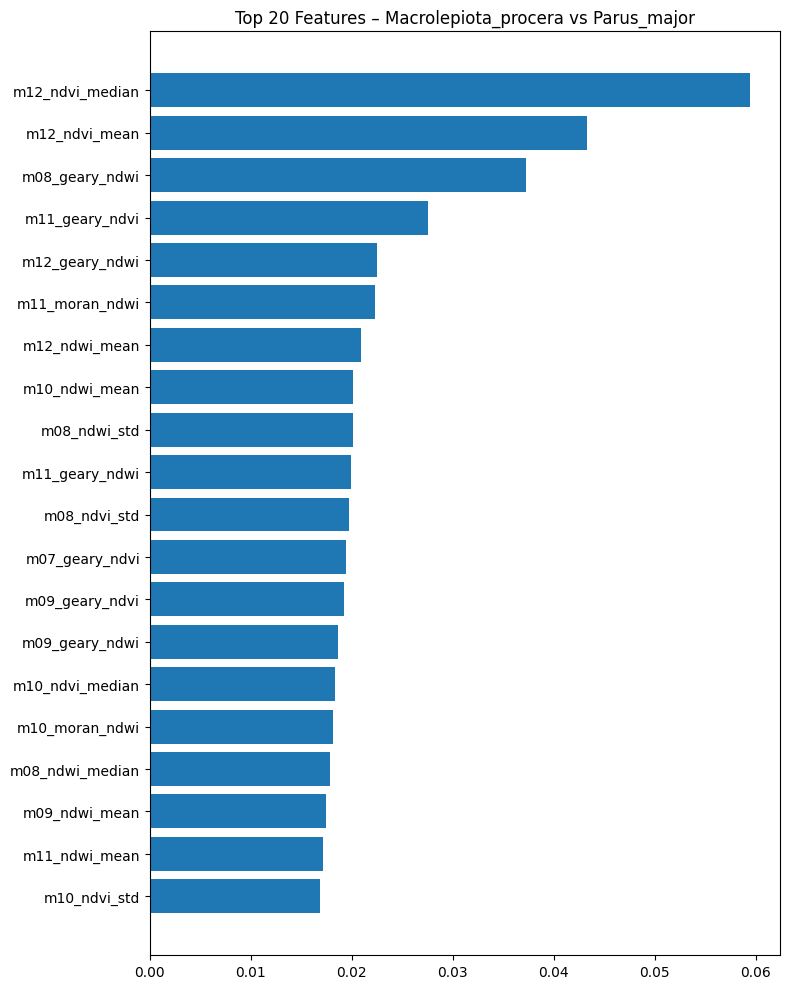

In [ ]:
from pipe.train_pilz_model import train_pilz_model
model, features = train_pilz_model()

In [8]:
import os
for root, dirs, files in os.walk("/Users/jakobkoppermann/Coding/inat_habitat_modeling"):
    if "bootstrap.py" in files:
        print("FOUND:", root)

FOUND: /Users/jakobkoppermann/Coding/inat_habitat_modeling


In [5]:
!python pipe/make_prediction_map.py

An error occurred: module 'importlib.metadata' has no attribute 'packages_distributions'
/Users/jakobkoppermann/Coding/inat_habitat_modeling/venv/lib/python3.9/site-packages/google/api_core/_python_version_support.py:252: FutureWarning: You are using a Python version (3.9.6) past its end of life. Google will update google.api_core with critical bug fixes on a best-effort basis, but not with any other fixes or features. Please upgrade to the latest Python version, or at least Python 3.10, and then update google.api_core.
  warnings.warn(message, FutureWarning)
/Users/jakobkoppermann/Coding/inat_habitat_modeling/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
🔧 BOOTSTRAP: Lade Konfiguration
📁 Projektwurzel: /Users/jakobkoppermann/Coding/inat_habitat_modeling
📄 default.yaml: /Users/jakobkoppe

In [1]:
import subprocess

SCRIPT = "pipe/make_prediction_map.py"   # dein Map-Skript

# ------------------------------------------
# 🔧 KONFIGURATION
# ------------------------------------------

# 👉 Option A: EIN Monat
#MONTHS = [8]

# 👉 Option B: MEHRERE Monate
#MONTHS = [7, 8, 9]

# 👉 Option C: ALLE Monate
MONTHS = [9]   # leer = alle Monate aus den Daten / deinem Script


# ------------------------------------------
# 🚀 Runner
# ------------------------------------------

if len(MONTHS) == 0:
    cmd = ["python", SCRIPT]  # keine --months Angabe → ALLE
else:
    cmd = ["python", SCRIPT, "--months"] + [str(m) for m in MONTHS]

print("📟 Running:", " ".join(cmd))
print("-" * 80)

subprocess.run(cmd)

📟 Running: python pipe/make_prediction_map.py --months 9
--------------------------------------------------------------------------------
📂 Lade Modell…
📄 Lade CSV für Feature-Reihenfolge…
🔢 Anzahl Features: 72
🗺️ Rastergröße: 11094 × 11351
💾 Schreibe Output: data/outputs/pilz_suitability.tif
  → Block 0:512  0:512 fertig.
  → Block 512:1024  0:512 fertig.
  → Block 1024:1536  0:512 fertig.
  → Block 1536:2048  0:512 fertig.
  → Block 2048:2560  0:512 fertig.
  → Block 2560:3072  0:512 fertig.
  → Block 3072:3584  0:512 fertig.
  → Block 3584:4096  0:512 fertig.
  → Block 4096:4608  0:512 fertig.
  → Block 4608:5120  0:512 fertig.
  → Block 5120:5632  0:512 fertig.
  → Block 5632:6144  0:512 fertig.
  → Block 6144:6656  0:512 fertig.
  → Block 6656:7168  0:512 fertig.
  → Block 7168:7680  0:512 fertig.
  → Block 7680:8192  0:512 fertig.
  → Block 8192:8704  0:512 fertig.
  → Block 8704:9216  0:512 fertig.
  → Block 9216:9728  0:512 fertig.
  → Block 9728:10240  0:512 fertig.
  → Block 

CompletedProcess(args=['python', 'pipe/make_prediction_map.py', '--months', '9'], returncode=0)

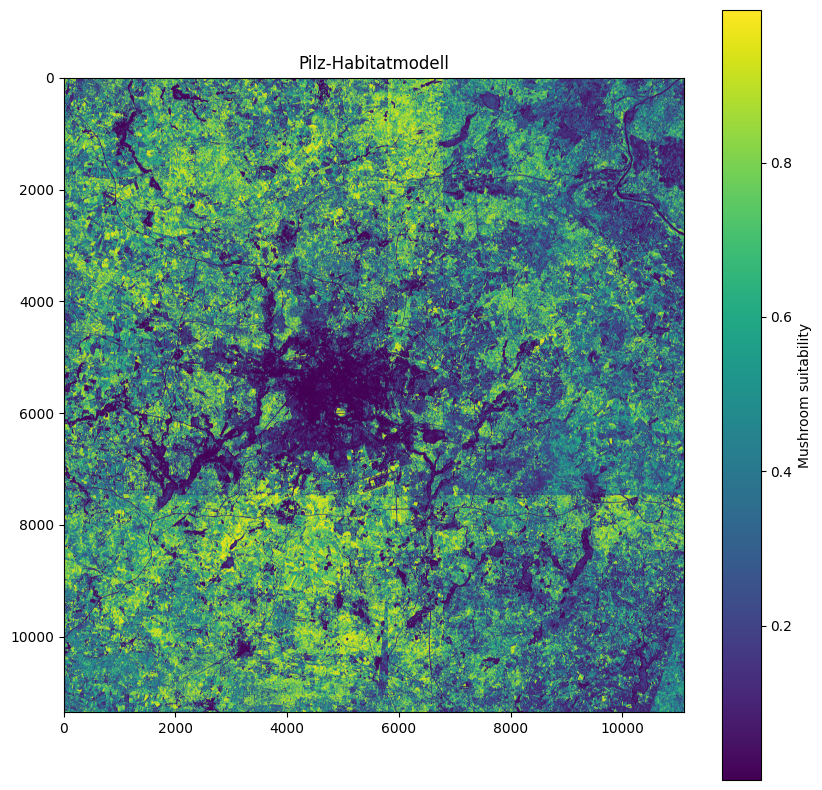

In [2]:
import rasterio
import matplotlib.pyplot as plt

path = "data/outputs/pilz_suitability.tif"

with rasterio.open(path) as src:
    arr = src.read(1)
    plt.figure(figsize=(10, 10))
    plt.imshow(arr, cmap="viridis")
    plt.colorbar(label="Mushroom suitability")
    plt.title("Pilz-Habitatmodell")

🔧 BOOTSTRAP: Lade Konfiguration
📁 Projektwurzel: /Users/jakobkoppermann/Coding/inat_habitat_modeling
📄 default.yaml: /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/default.yaml
📄 local.yaml:   /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/local.yaml

🔧 Prüfe Earth Engine…

✅ BOOTSTRAP abgeschlossen.

🎯 MONTHLY-MODELL: Macrolepiota_procera vs Parus_major
📄 Lade: /Volumes/Data/iNaturalist/features/Macrolepiota_procera/inat_with_climatology_Macrolepiota_procera_vs_Parus_major.csv
💾 Modell-Output: /Volumes/Data/iNaturalist/outputs/macrolepiota_procera/model_MONTHLY_Macrolepiota_procera_vs_Parus_major.json
💾 Importance-Plot: /Volumes/Data/iNaturalist/outputs/macrolepiota_procera/feature_importance_MONTHLY_Macrolepiota_procera_vs_Parus_major.png
🔍 WHITELIST Features:
   • m07_ndvi_mean
   • m07_ndwi_mean
   • m07_moran_ndvi
   • m07_geary_ndvi
   • m07_moran_ndwi
   • m07_geary_ndwi
   • m08_ndvi_mean
   • m08_ndwi_mean
   • m08_moran_ndvi
   • m08_geary_ndvi
   • m0

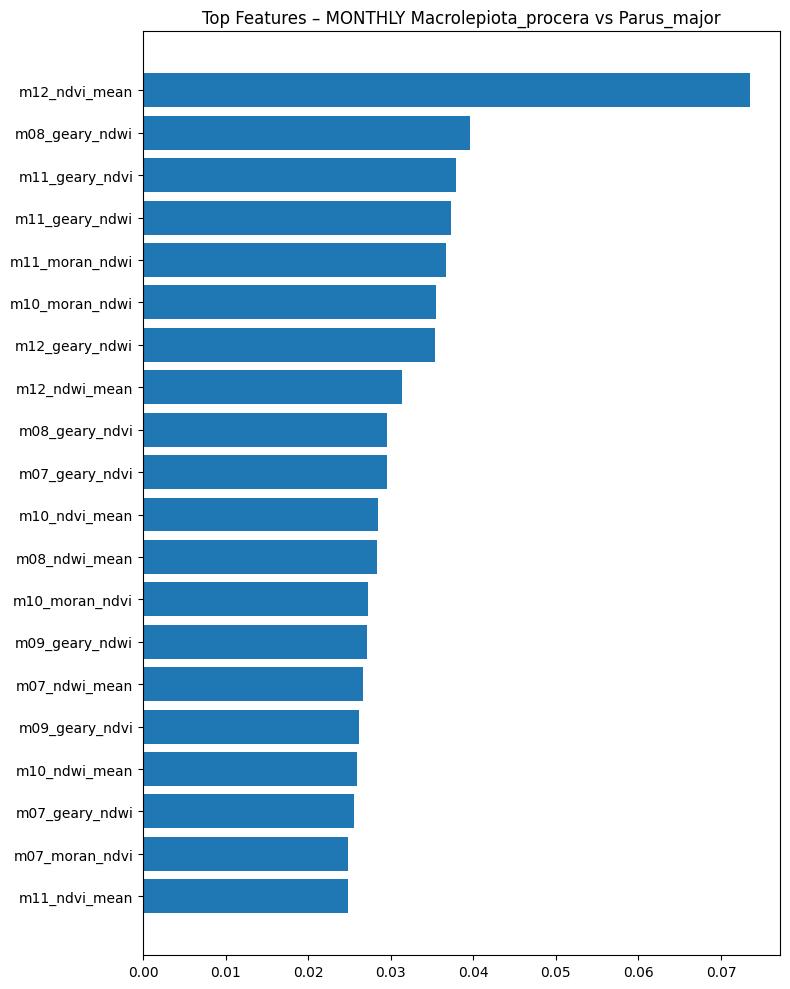

In [4]:
from pipe.train_pilz_model_monthly import train_pilz_model_monthly
from bootstrap import init as bootstrap_init

cfg = bootstrap_init(verbose=False)
model, feats = train_pilz_model_monthly(cfg)

In [15]:
import sys
sys.path.append("/Users/jakobkoppermann/Coding/inat_habitat_modeling")

from bootstrap import init as bootstrap_init
from pipe.make_prediction_map_yearly import run_prediction_for_year

cfg = bootstrap_init(verbose=False)

# Alle verfügbaren Jahre (du hast gesagt: 2020–2024)
for year in range(2020, 2025):
    run_prediction_for_year(cfg, year, month=10)

🔧 BOOTSTRAP: Lade Konfiguration
📁 Projektwurzel: /Users/jakobkoppermann/Coding/inat_habitat_modeling
📄 default.yaml: /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/default.yaml
📄 local.yaml:   /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/local.yaml

🔧 Prüfe Earth Engine…

✅ BOOTSTRAP abgeschlossen.

🌍 Prediction für Jahr 2020, Monat 10
✔ Raster gefunden: /Volumes/Data/iNaturalist/processed/NDVI_NDWI_MEAN_2020_10_AUTOCORR.tif
💾 Schreibe: /Volumes/Data/iNaturalist/outputs/macrolepiota_procera/suitability_2020_10_Macrolepiota_procera_vs_Parus_major.tif


IndexError: band index 5 out of range (not in (1, 2, 3, 4))

In [5]:
#Aufruf für Suitability map erstellungen

from bootstrap import init as bootstrap_init
from pipe.make_prediction_map_yearly import run_prediction_for_year

cfg = bootstrap_init(verbose=False)

for year in range(2017, 2020):   # STOP ist EXKLUSIV → 2020 bedeutet: 2017, 2018, 2019
    run_prediction_for_year(cfg, year)

🔧 BOOTSTRAP: Lade Konfiguration
📁 Projektwurzel: /Users/jakobkoppermann/Coding/inat_habitat_modeling
📄 default.yaml: /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/default.yaml
📄 local.yaml:   /Users/jakobkoppermann/Coding/inat_habitat_modeling/config/local.yaml

🔧 Prüfe Earth Engine…

✅ BOOTSTRAP abgeschlossen.

Features (MONTHLY model):
  • m07_ndvi_mean
  • m07_ndwi_mean
  • m07_moran_ndvi
  • m07_geary_ndvi
  • m07_moran_ndwi
  • m07_geary_ndwi
  • m08_ndvi_mean
  • m08_ndwi_mean
  • m08_moran_ndvi
  • m08_geary_ndvi
  • m08_moran_ndwi
  • m08_geary_ndwi
  • m09_ndvi_mean
  • m09_ndwi_mean
  • m09_moran_ndvi
  • m09_geary_ndvi
  • m09_moran_ndwi
  • m09_geary_ndwi
  • m10_ndvi_mean
  • m10_ndwi_mean
  • m10_moran_ndvi
  • m10_geary_ndvi
  • m10_moran_ndwi
  • m10_geary_ndwi
  • m11_ndvi_mean
  • m11_ndwi_mean
  • m11_moran_ndvi
  • m11_geary_ndvi
  • m11_moran_ndwi
  • m11_geary_ndwi
  • m12_ndvi_mean
  • m12_ndwi_mean
  • m12_moran_ndvi
  • m12_geary_ndvi
  • m12_moran